In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import random
import calendar

In [2]:
# 데이터 로드

data = pd.read_csv("C://Users//gwcat//Downloads//data3_usage_info(hours).csv",encoding = 'CP949')
data.head(5)

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2022-06-01,0,742,742. 등촌역 5번 출구 뒤,정기권,NaN,~10대,1,48.30,0.46,1999.70,10
1,2022-06-01,0,2059,2059. 보라매공원 정문,정기권,NaN,~10대,1,27.47,0.23,991.00,9
2,2022-06-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,NaN,~10대,1,20.63,0.20,868.17,3
3,2022-06-01,0,750,750. 연의근린공원 건너편,정기권,NaN,~10대,1,13.97,0.13,560.00,4
4,2022-06-01,0,755,755. 목동1단지아파트 상가 앞,정기권,NaN,~10대,1,12.15,0.14,590.00,3


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3704328 entries, 0 to 3704327
Data columns (total 12 columns):
 #   Column   Dtype  
---  ------   -----  
 0   대여일자     object 
 1   대여시간     int64  
 2   대여소번호    int64  
 3   대여소명     object 
 4   대여구분코드   object 
 5   성별       object 
 6   연령대코드    object 
 7   이용건수     int64  
 8   운동량      object 
 9   탄소량      object 
 10  이동거리(M)  float64
 11  이용시간(분)  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 339.1+ MB


In [4]:
# 연령대코드 전처리
data['연령대코드'].value_counts()

20대      1257122
30대       862500
40대       523899
기타        376098
50대       338900
~10대      227169
60대       103920
70대이상      14720
Name: 연령대코드, dtype: int64

In [5]:
data.loc[data['연령대코드'] == '70대이상', '연령대코드'] = '70대'
data.loc[data['연령대코드'] == '~10대', '연령대코드'] = '10대'
data.loc[data['연령대코드'] == '기타', '연령대코드'] = 'N'

In [6]:
data['연령대코드'].value_counts()

20대    1257122
30대     862500
40대     523899
N       376098
50대     338900
10대     227169
60대     103920
70대      14720
Name: 연령대코드, dtype: int64

In [7]:
# 성별 전처리
data["성별"].value_counts()

M    1469510
F     972289
m        572
f        237
Name: 성별, dtype: int64

In [8]:
data.loc[data['성별'] == 'f', '성별'] = 'F'
data.loc[data['성별'] == 'm', '성별'] = 'M'

In [9]:
data['성별'].value_counts()

M    1470082
F     972526
Name: 성별, dtype: int64

In [10]:
# 주말 or 평일 컬럼 추가

days = ['평일','평일','평일','평일','평일','주말','주말']
def get_day(data):
    day_str = data['대여일자']
    year,month,day=map(int,day_str.split('-'))
    return days[calendar.weekday(year,month,day)]

In [11]:
# 요일 컬럼 추가 
days2 = ['월','화','수','목','금','토','일']
def get_weeked(data):
    day_str = data['대여일자']
    year,month,day=map(int,day_str.split('-'))
    return days2[calendar.weekday(year,month,day)]

In [12]:
data['주말'] = data.apply(get_day,axis =1)
data['요일'] = data.apply(get_weeked,axis=1)

In [13]:
# 그래프를 그리기 위한 한글폰트 설정
import matplotlib.pyplot as plt

def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명 반환
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont

        font_family = "NanumBarunGothic"
    return font_family
# 시각화를 위한 폰트설정
# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family라는 변수에 할당합니다.
plt.style.use("ggplot")

font_family = get_font_family()
# 폰트설정
plt.rc("font", family=font_family)
# 마이너스 폰트 설정
plt.rc("axes", unicode_minus=False)
# 그래프에 retina display 적용
# from IPython.display import set_matplotlib_formats
# set_matplotlib_formats("retina")

%config InlineBackend.figure_format = 'retina'

<AxesSubplot:>

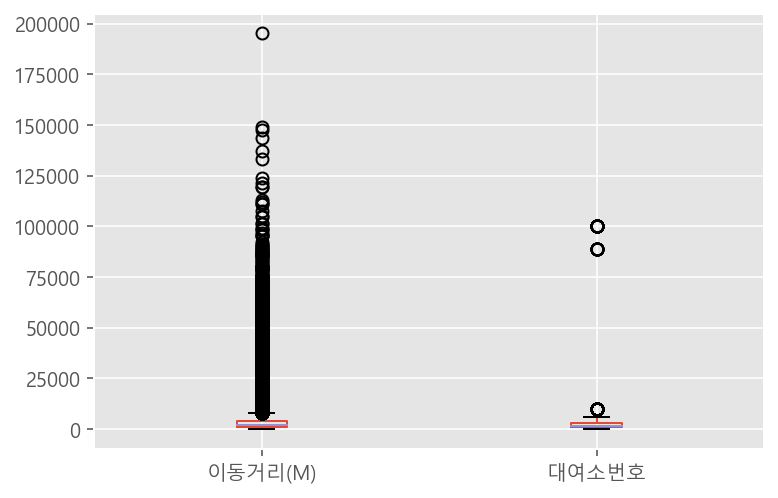

In [14]:
# 이상치 확인
data.boxplot(column=['이동거리(M)','대여소번호'])

In [15]:
# 이용시간 이상치 확인 
pd.options.display.float_format = '{:.5f}'.format
data['이용시간(분)'].describe()

count   3704328.00000
mean         26.22830
std          31.92456
min           0.00000
25%           7.00000
50%          15.00000
75%          34.00000
max        1938.00000
Name: 이용시간(분), dtype: float64

In [16]:
# 이상치 제거

# 1) 이동거리(M) 
condition=data['이동거리(M)']==0
a=data[condition].index
data.drop(a,inplace=True)

q1=data['이동거리(M)'].quantile(0.25)
q3=data['이동거리(M)'].quantile(0.75)
iqr=q3-q1

condition=data['이동거리(M)']>q3+1.5*iqr
a=data[condition].index
data.drop(a,inplace=True)


# 2) 대여소번호
q1=data['대여소번호'].quantile(0.25)
q3=data['대여소번호'].quantile(0.75)
iqr=q3-q1

condition=data['대여소번호']>q3+1.5*iqr
a=data[condition].index
data.drop(a,inplace=True)

# 3) 이용시간
# 이용시간이 0분,180분 이상인 것 제거
condition=(data['이용시간(분)']>180)|(data['이용시간(분)']==0)
a=data[condition].index
data.drop(a,inplace=True)

<AxesSubplot:>

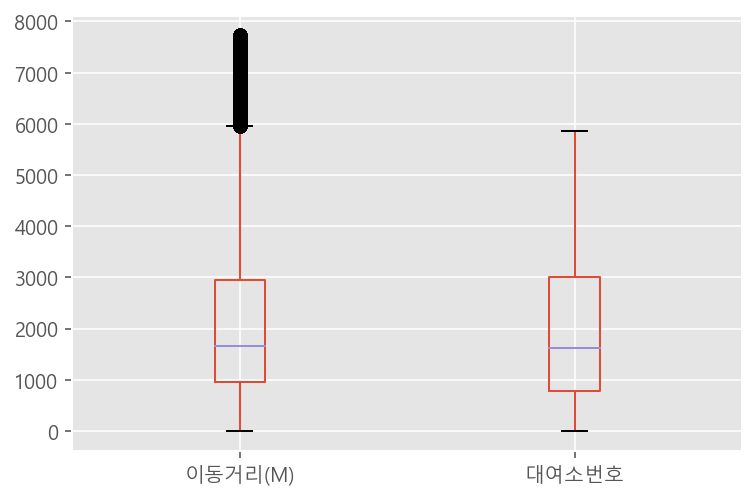

In [17]:
# 이상치 확인
data.boxplot(column=['이동거리(M)','대여소번호'])

In [18]:
pd.options.display.float_format = '{:.5f}'.format
data['이용시간(분)'].describe()

count   3282043.00000
mean         20.54655
std          21.56206
min           1.00000
25%           7.00000
50%          13.00000
75%          26.00000
max         180.00000
Name: 이용시간(분), dtype: float64

In [19]:
data.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),주말,요일
0,2022-06-01,0,742,742. 등촌역 5번 출구 뒤,정기권,NaN,10대,1,48.30,0.46,1999.70000,10,평일,수
1,2022-06-01,0,2059,2059. 보라매공원 정문,정기권,NaN,10대,1,27.47,0.23,991.00000,9,평일,수
2,2022-06-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,NaN,10대,1,20.63,0.20,868.17000,3,평일,수
3,2022-06-01,0,750,750. 연의근린공원 건너편,정기권,NaN,10대,1,13.97,0.13,560.00000,4,평일,수
4,2022-06-01,0,755,755. 목동1단지아파트 상가 앞,정기권,NaN,10대,1,12.15,0.14,590.00000,3,평일,수
